In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [2]:
X = loadmat('PaviaU.mat')['paviaU']
y = loadmat('PaviaU_gt.mat')['paviaU_gt']

In [3]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (610, 340, 103)
y: (610, 340)


In [4]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

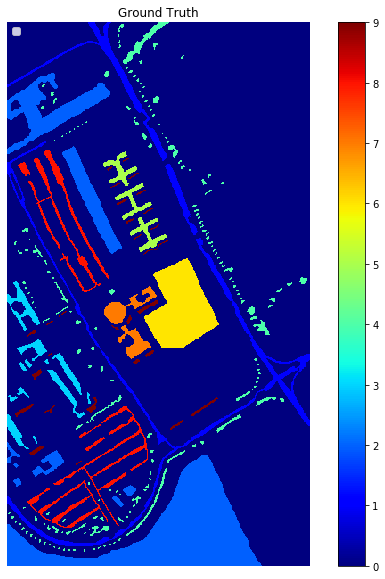

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], loc='upper left')
#plt.savefig('ground_truth.png')
plt.show()

In [6]:
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [7]:
y = y.ravel()

In [8]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (207400, 103)
y: (207400,)


In [9]:
label,counts=np.unique(y,return_counts=True)
print(label)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[164624   6631  18649   2099   3064   1345   5029   1330   3682    947]


In [10]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
scaler_model.fit(X.astype(float))
X=scaler_model.transform(X)

In [11]:
print("X:", (X.shape))

X: (207400, 103)


In [12]:
X = (X[y>0,:])
Y = (y[y>0])

In [13]:
print(X.shape)
print(Y.shape)

(42776, 103)
(42776,)


In [14]:
pca = PCA(n_components=0.998)

In [15]:
X = pca.fit_transform(X)


In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.6522034 , 0.93150029, 0.98759194, 0.99201315, 0.99462326,
       0.99605318, 0.99714842, 0.99783991, 0.9982363 ])

In [17]:
print(X.shape)
print(pca.n_components_)

(42776, 9)
9


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.25, stratify=Y )

In [19]:
print(X_train.shape)
print(X_test.shape)

(32082, 9)
(10694, 9)


In [20]:
label_tr,counts_tr=np.unique(y_train,return_counts=True)
label_te,counts_te=np.unique(y_test,return_counts=True)
print(pd.DataFrame(counts_tr,label_tr))
print(pd.DataFrame(counts_te,label_te))

       0
1   4973
2  13987
3   1574
4   2298
5   1009
6   3772
7    997
8   2762
9    710
      0
1  1658
2  4662
3   525
4   766
5   336
6  1257
7   333
8   920
9   237


In [21]:
#Applying Scalar to train and test Dataset

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

9


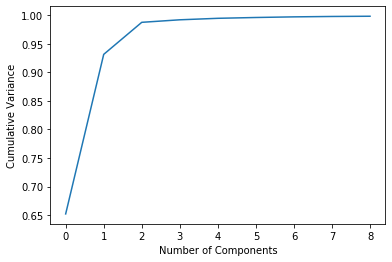

In [34]:
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance') #for each component
#plt.title('Inidian_pines Dataset Explained Variance')
plt.savefig('Pavia_University_Explainedvariance_Final')
plt.show()

In [23]:
#Appplying SVM 

from sklearn.svm import SVC

In [24]:
from sklearn import metrics

In [25]:
# C_2d_range = range(10)/0.1
# gamma_2d_range = [0.01,0.1,0.2,0.3,1]
classifiers = []
# C_range=10
# Gamma_range = 10
Train_acc=[]
Valid_acc=[]
accuracy = -1
accuracy_train = -1
for C in np.arange(1,102,25):
    for gamma in np.arange(0.001,0.1,0.005):
        
        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train =metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)
        if (acc_train>accuracy_train):
            
            accuracy_train=acc_train
            best_c_train = C
            best_g_train=gamma
        print("C_train= ",C," Best C_train = ",best_c_train," gamma_train = ",gamma," best_gamma_train= ",best_g_train," Accuracy_train = ",acc_train," Best Accuracy_train = ",accuracy_train,"\n")

        if (acc>accuracy):
            accuracy=acc
            best_c = C
            best_g=gamma
        
        print("C= ",C," Best C = ",best_c," gamma = ",gamma," best_gamma= ",best_g," Accuracy = ",acc," Best Accuracy = ",accuracy,"\n")
        
        

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.001  best_gamma_train=  0.001  Accuracy_train =  0.7917523845146811  Best Accuracy_train =  0.7917523845146811 

C=  1  Best C =  1  gamma =  0.001  best_gamma=  0.001  Accuracy =  0.7877314381896391  Best Accuracy =  0.7877314381896391 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.006  best_gamma_train=  0.006  Accuracy_train =  0.833800885231594  Best Accuracy_train =  0.833800885231594 

C=  1  Best C =  1  gamma =  0.006  best_gamma=  0.006  Accuracy =  0.8289695156162334  Best Accuracy =  0.8289695156162334 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.011  best_gamma_train=  0.011  Accuracy_train =  0.8436506452216196  Best Accuracy_train =  0.8436506452216196 

C=  1  Best C =  1  gamma =  0.011  best_gamma=  0.011  Accuracy =  0

C_train=  26  Best C_train =  26  gamma_train =  0.016  best_gamma_train=  0.016  Accuracy_train =  0.8925565737796896  Best Accuracy_train =  0.8925565737796896 

C=  26  Best C =  26  gamma =  0.016  best_gamma=  0.016  Accuracy =  0.8885356274546474  Best Accuracy =  0.8885356274546474 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.021  best_gamma_train=  0.021  Accuracy_train =  0.8956424163082102  Best Accuracy_train =  0.8956424163082102 

C=  26  Best C =  26  gamma =  0.021  best_gamma=  0.021  Accuracy =  0.8917149803628203  Best Accuracy =  0.8917149803628203 

----------------------------------------------------------------
C_train=  26  Best C_train =  26  gamma_train =  0.026000000000000002  best_gamma_train=  0.026000000000000002  Accuracy_train =  0.8986970887101802  Best Accuracy_train =  0.8986970887101802 

C=  26  Best C =  26  gamma =  0.026000000000000002  best_gamma=  0.026000000000000002  Accu

C_train=  51  Best C_train =  26  gamma_train =  0.031  best_gamma_train=  0.096  Accuracy_train =  0.9052428152858301  Best Accuracy_train =  0.9183342684371298 

C=  51  Best C =  26  gamma =  0.031  best_gamma=  0.091  Accuracy =  0.8957359266878624  Best Accuracy =  0.9019076117449036 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.036000000000000004  best_gamma_train=  0.096  Accuracy_train =  0.9067701514868151  Best Accuracy_train =  0.9183342684371298 

C=  51  Best C =  26  gamma =  0.036000000000000004  best_gamma=  0.091  Accuracy =  0.8978866654198616  Best Accuracy =  0.9019076117449036 

----------------------------------------------------------------
C_train=  51  Best C_train =  26  gamma_train =  0.041  best_gamma_train=  0.096  Accuracy_train =  0.9090767408515679  Best Accuracy_train =  0.9183342684371298 

C=  51  Best C =  26  gamma =  0.041  best_gamma=  0.091  Accuracy =  0.899476341873948  Bes

C_train=  76  Best C_train =  51  gamma_train =  0.046  best_gamma_train=  0.096  Accuracy_train =  0.9130665170500593  Best Accuracy_train =  0.9233838289383455 

C=  76  Best C =  51  gamma =  0.046  best_gamma=  0.076  Accuracy =  0.9020011221245559  Best Accuracy =  0.9022816532635123 

----------------------------------------------------------------
C_train=  76  Best C_train =  51  gamma_train =  0.051000000000000004  best_gamma_train=  0.096  Accuracy_train =  0.9147497038837977  Best Accuracy_train =  0.9233838289383455 

C=  76  Best C =  51  gamma =  0.051000000000000004  best_gamma=  0.076  Accuracy =  0.902094632504208  Best Accuracy =  0.9022816532635123 

----------------------------------------------------------------
C_train=  76  Best C_train =  51  gamma_train =  0.056  best_gamma_train=  0.096  Accuracy_train =  0.9162146998316814  Best Accuracy_train =  0.9233838289383455 

C=  76  Best C =  51  gamma =  0.056  best_gamma=  0.076  Accuracy =  0.9022816532635123  Bes

C_train=  101  Best C_train =  76  gamma_train =  0.061  best_gamma_train=  0.096  Accuracy_train =  0.9193317124867527  Best Accuracy_train =  0.9268748831120255 

C=  101  Best C =  101  gamma =  0.061  best_gamma=  0.046  Accuracy =  0.9021881428838601  Best Accuracy =  0.9026556947821208 

----------------------------------------------------------------
C_train=  101  Best C_train =  76  gamma_train =  0.066  best_gamma_train=  0.096  Accuracy_train =  0.9207967084346362  Best Accuracy_train =  0.9268748831120255 

C=  101  Best C =  101  gamma =  0.066  best_gamma=  0.046  Accuracy =  0.9011595287076866  Best Accuracy =  0.9026556947821208 

----------------------------------------------------------------
C_train=  101  Best C_train =  76  gamma_train =  0.07100000000000001  best_gamma_train=  0.096  Accuracy_train =  0.9220435134966648  Best Accuracy_train =  0.9268748831120255 

C=  101  Best C =  101  gamma =  0.07100000000000001  best_gamma=  0.046  Accuracy =  0.9015335702262

In [26]:
clf = SVC(C=101,gamma=0.046,decision_function_shape='ovo')

In [27]:
clf.fit(X_train, y_train)

SVC(C=101, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.046, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy : 90.26556947821209


In [31]:
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)

Cohen Kappa Score : 86.91347621403827


In [32]:
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93      1658
           2       0.91      0.97      0.94      4662
           3       0.76      0.74      0.75       525
           4       0.95      0.90      0.93       766
           5       1.00      1.00      1.00       336
           6       0.90      0.67      0.77      1257
           7       0.87      0.81      0.84       333
           8       0.83      0.88      0.85       920
           9       1.00      1.00      1.00       237

    accuracy                           0.90     10694
   macro avg       0.91      0.88      0.89     10694
weighted avg       0.90      0.90      0.90     10694



In [33]:
print(pd.DataFrame(mat))

      0     1    2    3    4    5    6    7    8
0  1537     0   29    0    0    1   62   25    1
1     0  4544    0   73    0  399    0    0    0
2    36     0  387    0    0    1    1   82    0
3     0    29    0  693    0    4    0    0    0
4     0     0    0    0  336    0    0    0    0
5     2    86    2    0    0  844    0    5    0
6    40     0    0    0    0    0  270    2    0
7    43     3  107    0    0    8    0  806    0
8     0     0    0    0    0    0    0    0  236
